In [1]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time

# record start time
start = time.time()
le = LabelEncoder()

df = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/telco_churn.csv')

df['Churn']=le.fit_transform(df['Churn'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['gender']=le.fit_transform(df['gender'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

#filling missing value with mean
df['TotalCharges'].replace(to_replace = 0, value = df['TotalCharges'].mean(), inplace=True)
df=df.drop(['customerID'],axis=1)
#X=df.drop(['customerID','Churn'],axis=1)
#y=df['Churn']

df0=df[df['Churn']==0]
df1=df[df['Churn']==1]



In [ ]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1


In [2]:
pip install ctganenn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 19.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_c

In [3]:
from ctganenn import CTGANENN

X,y=CTGANENN(df1,df0,3305,'Churn')

Gen. (-0.39) | Discrim. (0.02): 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


In [ ]:
# SVM
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
model = SVC()
# define grid
balance = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
#balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.956756 using {'class_weight': {0: 50, 1: 100}}
0.942988 (0.004595) with: {'class_weight': {0: 10, 1: 100}}
0.952724 (0.004001) with: {'class_weight': {0: 20, 1: 100}}
0.955214 (0.003291) with: {'class_weight': {0: 30, 1: 100}}
0.955830 (0.003240) with: {'class_weight': {0: 40, 1: 100}}
0.956756 (0.003050) with: {'class_weight': {0: 50, 1: 100}}
0.956312 (0.002995) with: {'class_weight': {0: 60, 1: 100}}
0.954580 (0.003170) with: {'class_weight': {0: 70, 1: 100}}
0.953082 (0.003338) with: {'class_weight': {0: 80, 1: 100}}
0.951908 (0.003379) with: {'class_weight': {0: 90, 1: 100}}
0.951318 (0.003476) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('svm-teclo-ctganenn-cs-auc-fp.xlsx', index=False)

In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.901007 using {'class_weight': {0: 70, 1: 100}}
0.714222 (0.008409) with: {'class_weight': {0: 10, 1: 100}}
0.812623 (0.006717) with: {'class_weight': {0: 20, 1: 100}}
0.841904 (0.006690) with: {'class_weight': {0: 30, 1: 100}}
0.865223 (0.006746) with: {'class_weight': {0: 40, 1: 100}}
0.882534 (0.007831) with: {'class_weight': {0: 50, 1: 100}}
0.895461 (0.008183) with: {'class_weight': {0: 60, 1: 100}}
0.901007 (0.007924) with: {'class_weight': {0: 70, 1: 100}}
0.897869 (0.007608) with: {'class_weight': {0: 80, 1: 100}}
0.891149 (0.007970) with: {'class_weight': {0: 90, 1: 100}}
0.888003 (0.007786) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('svm-teclo-ctganenn-cs-f1-fp.xlsx', index=False)

In [ ]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.899725 using {'class_weight': {0: 60, 1: 100}}
0.751493 (0.008501) with: {'class_weight': {0: 10, 1: 100}}
0.843740 (0.006596) with: {'class_weight': {0: 20, 1: 100}}
0.866592 (0.006180) with: {'class_weight': {0: 30, 1: 100}}
0.883441 (0.006595) with: {'class_weight': {0: 40, 1: 100}}
0.893321 (0.007802) with: {'class_weight': {0: 50, 1: 100}}
0.899725 (0.007789) with: {'class_weight': {0: 60, 1: 100}}
0.897921 (0.007945) with: {'class_weight': {0: 70, 1: 100}}
0.887984 (0.008039) with: {'class_weight': {0: 80, 1: 100}}
0.877075 (0.008399) with: {'class_weight': {0: 90, 1: 100}}
0.870483 (0.008483) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('svm-teclo-ctganenn-cs-gmean-fp.xlsx', index=False)

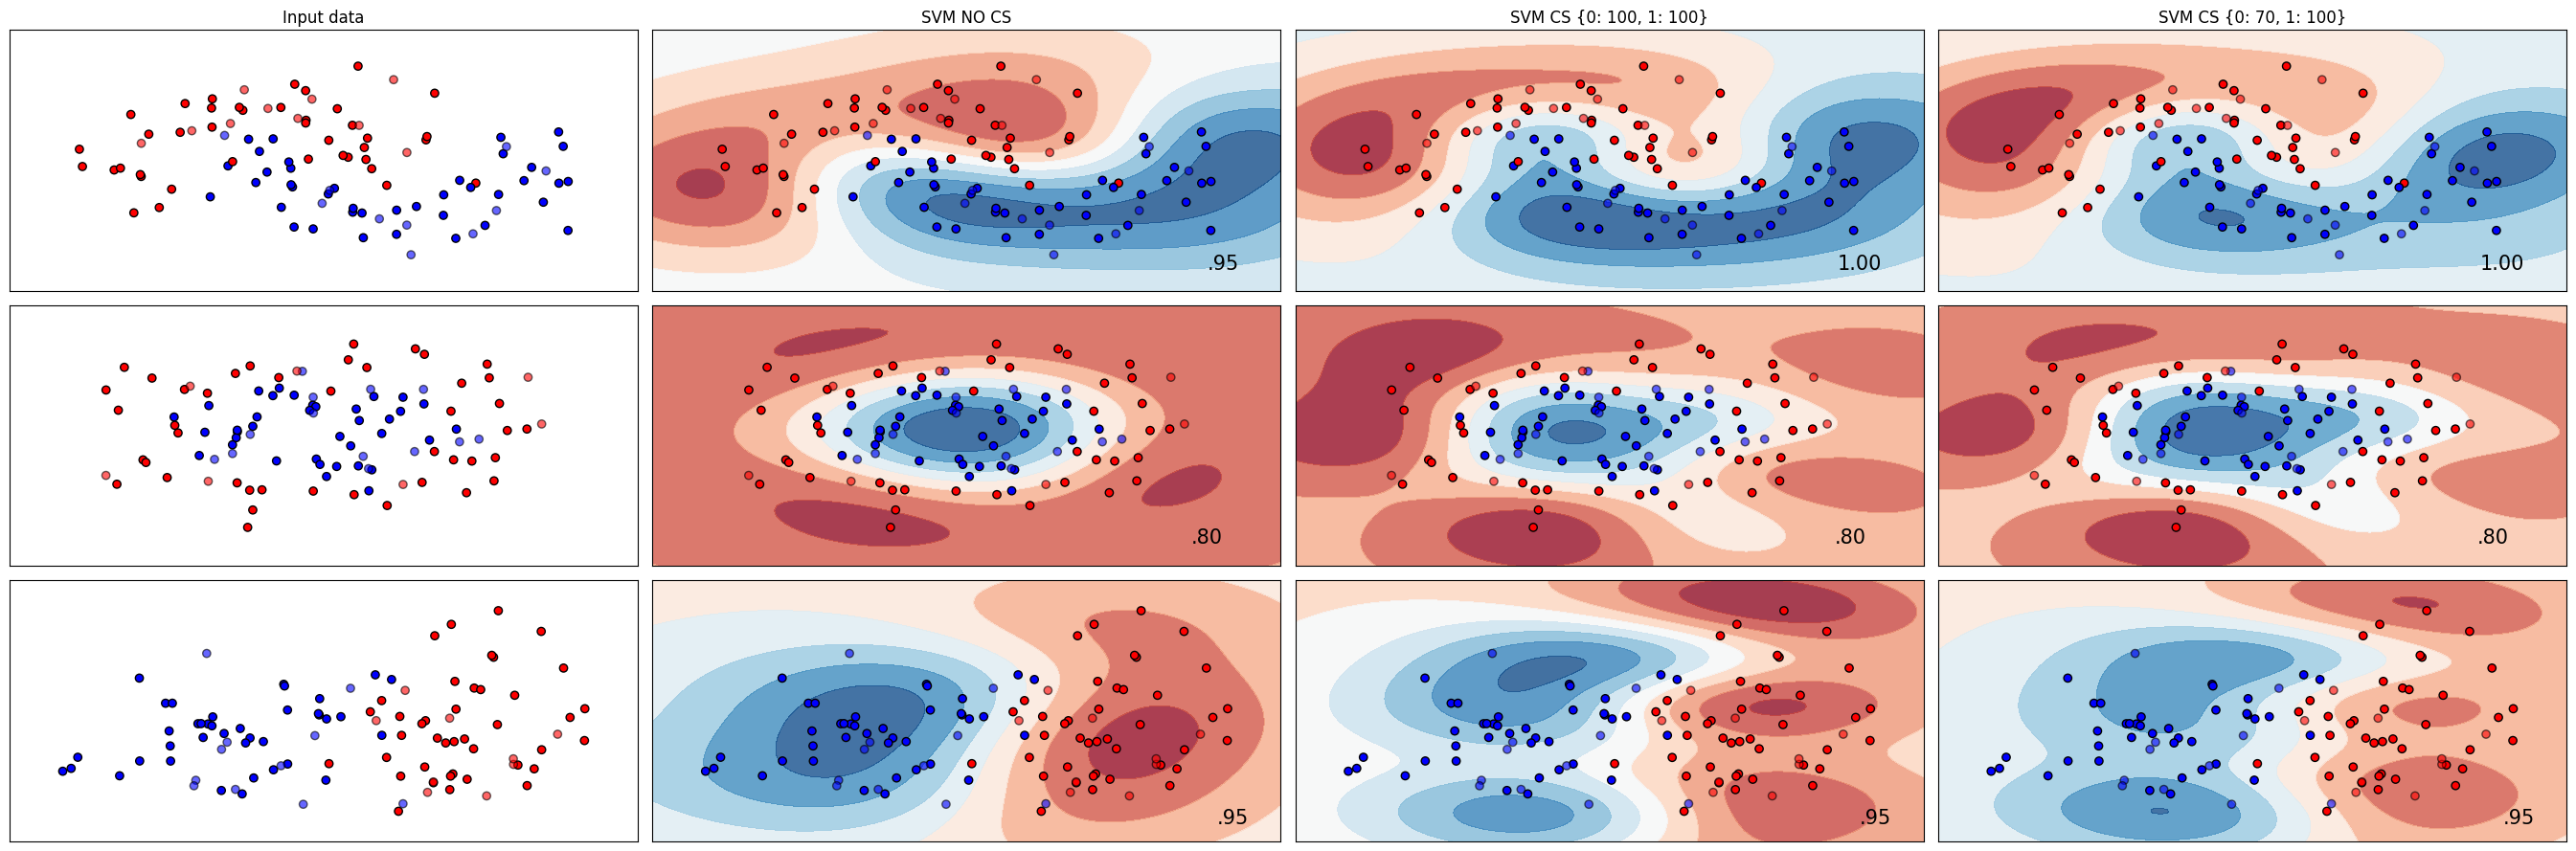

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


names = [
     "SVM NO CS",
     "SVM CS {0: 100, 1: 100}",
    "SVM CS {0: 70, 1: 100}",
]

classifiers = [
    SVC(),
    SVC(class_weight={0: 100, 1: 100}),
    SVC(class_weight={0: 70, 1: 100})
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()